<a href="https://colab.research.google.com/github/anjumkhan872/Project-Foundations-for-Data-Science-FoodHub-Data-Analysis/blob/main/Anjum_project1_PCA_and_tSNE_Project_FullCode_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


This code sets up the necessary libraries for data manipulation (pandas), numerical operations (NumPy), data visualization (Matplotlib and Seaborn), data scaling (StandardScaler), and dimensionality reduction (PCA and t-SNE).







#Loading Data

In [ ]:
data = pd.read_csv("auto-mpg.csv")

The line of code data = pd.read_csv("auto-mpg.csv") is a fundamental step in data analysis with Python, enabling us to load structured data from a CSV file into a Pandas DataFrame, which we can then manipulate and analyze using Pandas' powerful functions.

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


The data provides a snapshot of car characteristics from 1970, highlighting their fuel efficiency, engine power, weight, and acceleration. This information can be useful for understanding the performance and design trends of cars from that era. Further analysis could involve comparing these characteristics to modern cars, examining trends over time, or exploring correlations between different variables.

### **Data Overview**

- Observations
- Sanity checks




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


1.The DataFrame contains 398 entries, indexed from 0 to 397.
2.There are 8 columns in the DataFrame
3.All columns have 398 non-null entries, indicating there are no missing values in the dataset.
4.Horsepower and car name are of type object. Notably, horsepower being an object type suggests it may contain some non-numeric values that need to be cleaned or converted.

In [ ]:
data.duplicated().sum()

0

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



Checking unique values in car name column




The 'car name' column is of the object data type and contains many unique entries, which do not contribute significantly to our analysis. Therefore, we can remove this column.

In [ ]:
data['car name'].nunique()

305

Finding the number of unique car names can help us understand how many different car models are represented in the dataset. This can be useful for analyses like comparing the fuel efficiency across different car models or determining the most common car models in the dataset.

In [ ]:
# Making a copy of the data to preserve the original dataset
data1 = data.copy()

# Removing the 'car name' column from the dataset
data = data.drop(['car name'], axis=1)


**Purpose and Usage**
**Creating a Backup:** Copying the DataFrame ensures we have the original data preserved before making changes.
**Removing Unnecessary Columns:** Dropping the car name column might be useful if we do not need this column for further analysis, reducing the DataFrame to only the relevant data.

Verifying the values within the 'horsepower' column.

In [ ]:
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit()) # Evaluating if each entry in the 'horsepower' column consists of only digits

data[hpIsDigit['horsepower'] == False] # Selecting rows where the 'horsepower' column contains non-digit values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


Purpose and Usage Data Cleaning: Identifying and isolating rows with non-numeric horsepower values can be a crucial step in data cleaning. These rows may need to be handled differently (e.g., imputation, removal, or further investigation) before proceeding with data analysis or modeling.

By using this code, we can effectively isolate and examine the rows in our dataset where the horsepower values are not purely numeric, allowing us to take appropriate action based on our specific requirements.

Substituting '?' with NaN values

In [ ]:
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


Purpose and Usage Data Cleaning: By replacing '?' with np.nan, ensure that invalid entries are recognized as missing values. This makes it easier to handle these entries appropriately (e.g., imputation, removal). *Data Filtering: *Filtering the DataFrame to include only rows where horsepower is not a digit helps us isolate and examine problematic entries. This can be crucial for understanding data quality issues and deciding how to address them. This code ensures that non-numeric horsepower values are treated as missing data and then isolates those rows for further examination or cleaning.

In [ ]:
data['horsepower'].fillna(data['horsepower'].median(), inplace=True) #Filling missing values in the 'horsepower' column with the median value of the column
data['horsepower'] = data['horsepower'].astype('float64') #Converting the data type of the 'horsepower' column from object to float

Purpose Handling Missing Data: By filling NaN values with the median, we ensure that the horsepower column has no missing values. Using the median is a common technique because it is robust to outliers and provides a reasonable estimate for missing data. Purpose Ensuring Consistent Data Types: Converting the horsepower column to float64 ensures that all values in the column are numeric and of the same type. This is important for any subsequent numerical analysis or calculations involving this column.

### **Summary Statistics**

In [ ]:
# Check the summary statistics of the data
summary_statistics = data.describe()
print(summary_statistics)


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


**Observations:________**
1.**Count:**
All variables have 398 non-null entries, indicating a complete dataset with no missing values.
2.**Range:**
The variables span a wide range of values, evident from the difference between minimum and maximum values.
For instance, displacement ranges from 68 to 455, and weight ranges from 1613 to 5140.
3.**Central Tendency:**
The mean and median values for most variables are relatively close, indicating approximately symmetric distributions.
mpg has a mean of 23.51 and a median of 23.0, suggesting a roughly symmetrical distribution around the central tendency.
4.**Dispersion:**
Standard deviations (std) indicate the degree of dispersion or spread around the mean.
For example, weight has a standard deviation of approximately 846.84, suggesting considerable variability in car weights.
5.**Percentiles:**
Percentiles (25th, 50th, and 75th) provide insights into the distribution's spread and central tendency.
For instance, the 25th percentile (25%) for mpg is 17.5, the median (50%) is 23.0, and the 75th percentile (75%) is 29.0.
6.**Model Year:**
The model year variable ranges from 70 to 82, with a mean of approximately 76.01, indicating the average year.
7.**Cylinders:**
1The cylinders variable has a mean of approximately 5.45, suggesting that most cars in the dataset have around 5 to 6 cylinders.

GENERAL OBSERVATION
1.The dataset is well-populated with 398 entries for each variable.
2.There is a wide range in all numeric variables, indicating diversity in car specifications.
3.The mean and median values for most variables are relatively close, suggesting that the distributions of these variables may be fairly symmetric, although this would need to be confirmed with visualizations (e.g., histograms).
4.The standard deviations indicate varying levels of dispersion, with weight and displacement showing particularly large spreads.


**We'll examine the distribution of values and identify any outliers present in each column of the dataset.**
1.Generate histograms to examine the distribution of each variable.
2.Construct boxplots to visualize outliers across all variables.

Column: mpg
Skewness: 0.46


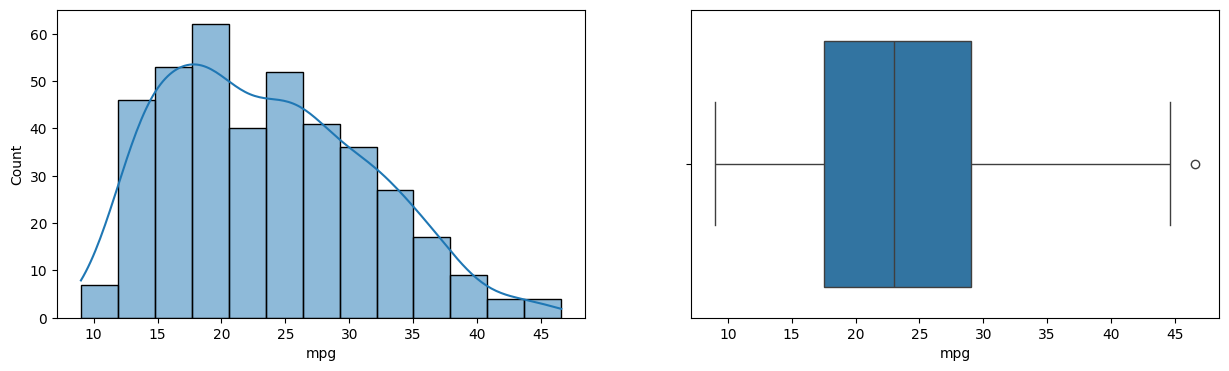

Column: cylinders
Skewness: 0.53


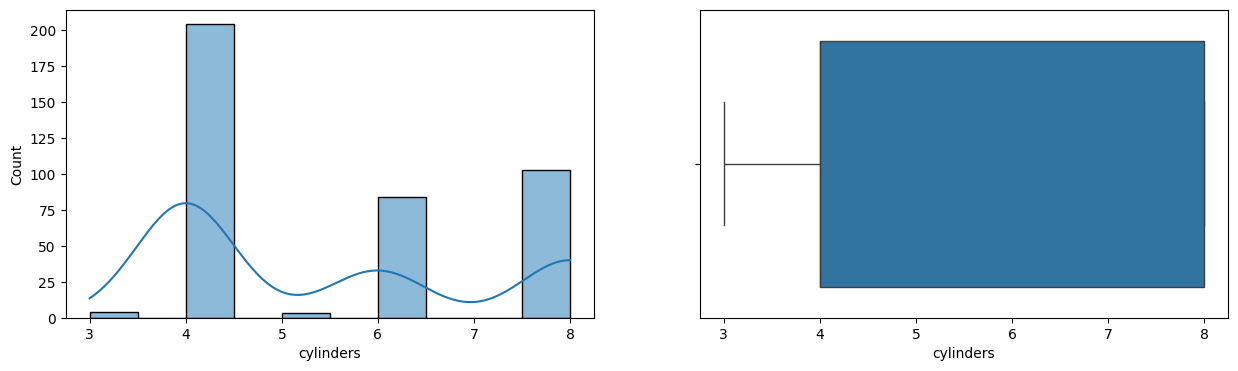

Column: displacement
Skewness: 0.72


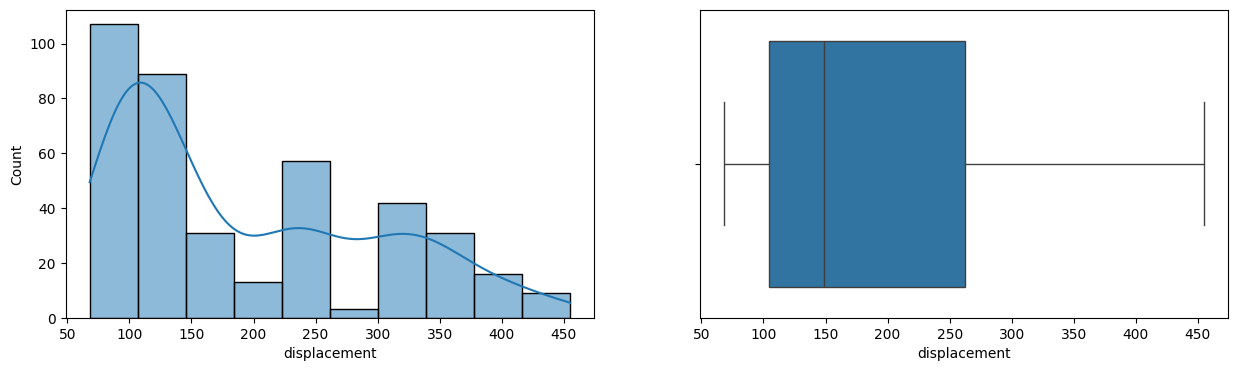

Column: horsepower
Skewness: 1.11


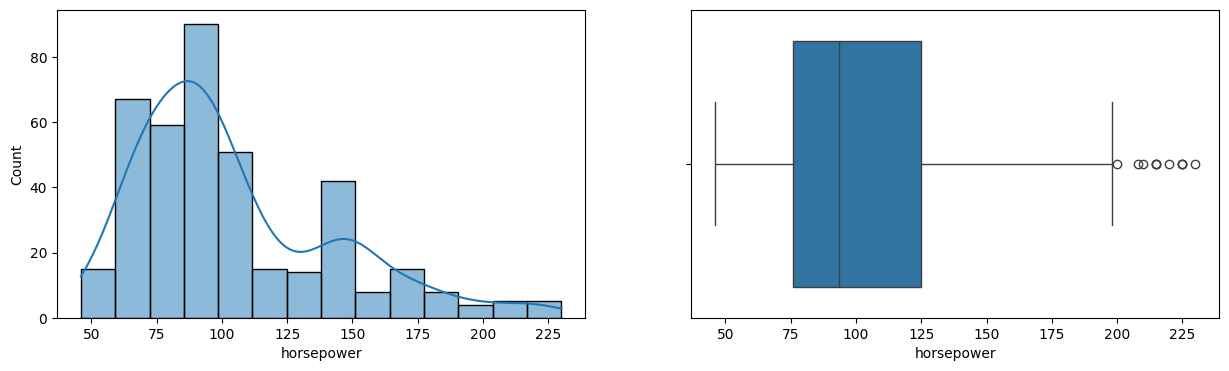

Column: weight
Skewness: 0.53


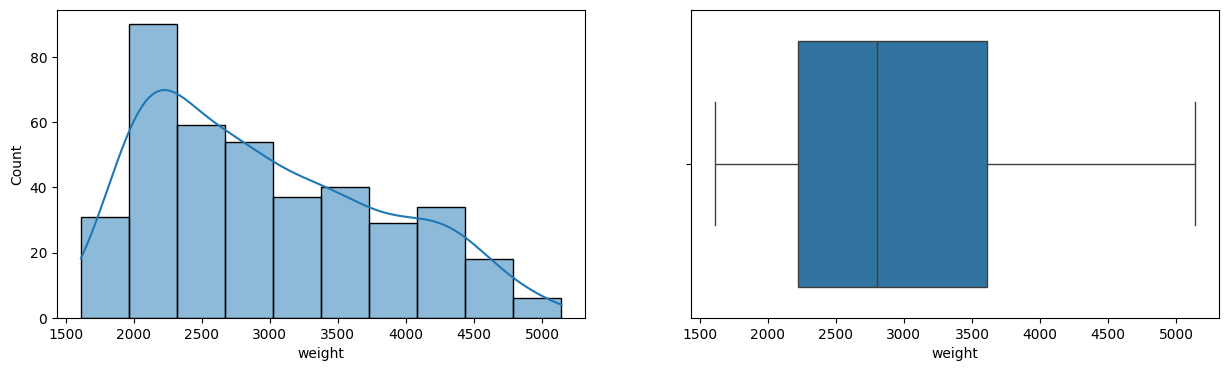

Column: acceleration
Skewness: 0.28


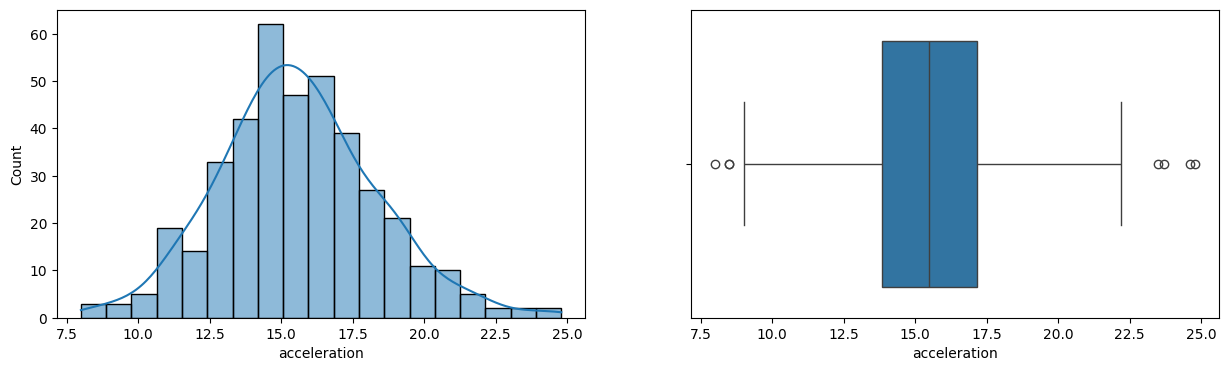

Column: model year
Skewness: 0.01


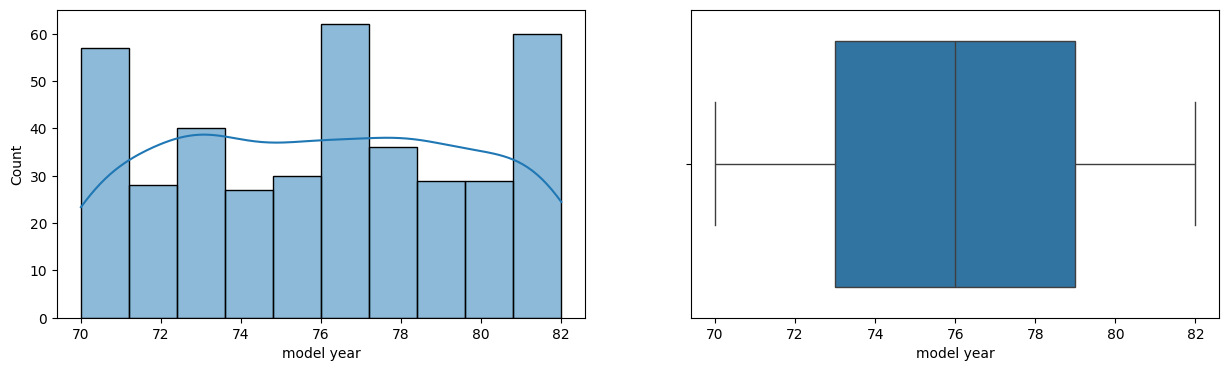

In [ ]:
# Iterate through each column in the dataset
for col in data.columns:
    # Print the column name and its skewness
    print(f"Column: {col}")
    print('Skewness:', round(data[col].skew(), 2))

    # Set up the figure size
    plt.figure(figsize=(15, 4))

    # Create subplot for histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.ylabel('Count')

    # Create subplot for box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])

    # Show the plots
    plt.show()


The skewness values for the variables indicate the distribution shape:

**mpg:** Slightly positively skewed, indicating mostly higher fuel efficiency.
**Cylinders:** Moderately positively skewed, with 4 and 8 cylinders being common.
**Displacement:** Moderately positively skewed, most cars have lower displacement.
**Horsepower**: Positively skewed, most cars have lower horsepower.
**Weight**: Moderately positively skewed, most cars are lighter.
**Acceleration:** Slightly positively skewed, indicating quicker acceleration for most cars.
**Model year:** Nearly symmetrical, with cars mostly from the late 1970s to early 1980s.


Checking correlation

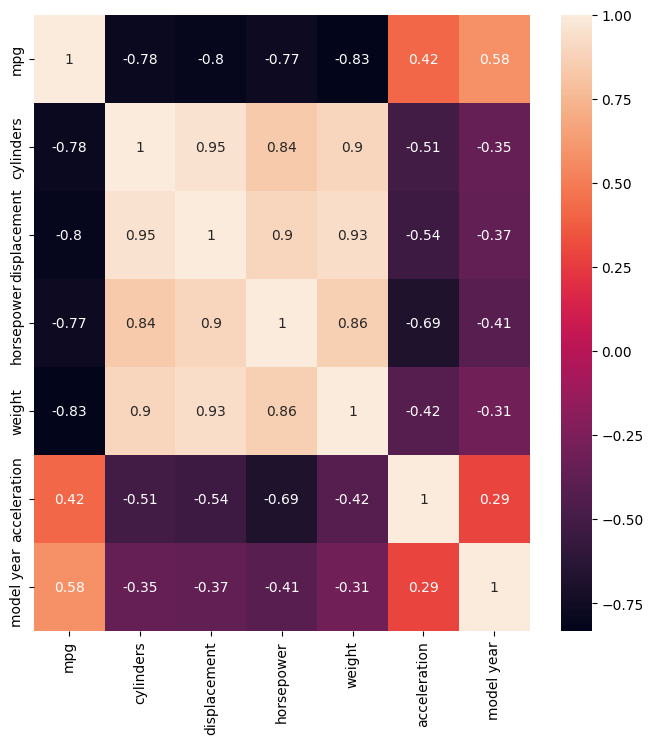

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.select_dtypes(include="number").corr(), annot=True)
plt.show()


1.The variable 'mpg' exhibits a robust negative correlation with 'cylinders', 'displacement', 'horsepower', and 'weight'.
2.Horsepower and acceleration show a negative correlation.
3.The variable 'weight' demonstrates a significant positive correlation with 'horsepower', 'displacement', and 'cylinders'
4.Additionally, 'model year' exhibits a positive correlation with 'mpg'.

### **Scaling the data**

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data_scaled.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


The values are scaled such that each feature now has a mean of approximately 0 and a standard deviation of approximately 1, ensuring that all features contribute equally to the analysis and preventing features with larger magnitudes from dominating the model.







## **Principal Component Analysis**

In [ ]:
numerical_cols = data.select_dtypes(include='number').columns

# Instantiate the scaler
scaler = StandardScaler()

# Scale the numerical columns
data_scaled = data.copy()  # Make a copy of the original data
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# Check for missing values in the data
missing_values = data_scaled.isnull().sum()

# If there are missing values, handle them using an appropriate method
if missing_values.any():
    # Option 1: Drop rows with missing values
    data_scaled = data_scaled.dropna()

Ensure your data is numerical and standardized (scaled) so that each feature has a mean of 0 and a standard deviation of 1. If not, apply feature scaling (e.g., using StandardScaler).

In [ ]:
n = data_scaled.shape
pca = PCA(random_state=1)
data_pca = pca.fit_transform(data_scaled)
exp_var = pca.explained_variance_ratio_

Computing Covariance Matrix:

In [ ]:
cov_matrix = np.cov(data, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 6.10896108e+01 -1.03089111e+01 -6.55402318e+02 -2.31067162e+02
  -5.50521175e+03  9.05892966e+00  1.67411630e+01]
 [-1.03089111e+01  2.89341544e+00  1.68623214e+02  5.46976634e+01
   1.29069557e+03 -2.37084225e+00 -2.19349898e+00]
 [-6.55402318e+02  1.68623214e+02  1.08721992e+04  3.57009438e+03
   8.23684232e+04 -1.56332976e+02 -1.42717137e+02]
 [-2.31067162e+02  5.46976634e+01  3.57009438e+03  1.46096905e+03
   2.79159789e+04 -7.23707530e+01 -5.84740959e+01]
 [-5.50521175e+03  1.29069557e+03  8.23684232e+04  2.79159789e+04
   7.17140991e+05 -9.74899011e+02 -9.59946344e+02]
 [ 9.05892966e+00 -2.37084225e+00 -1.56332976e+02 -7.23707530e+01
  -9.74899011e+02  7.60484823e+00  2.93810488e+00]
 [ 1.67411630e+01 -2.19349898e+00 -1.42717137e+02 -5.84740959e+01
  -9.59946344e+02  2.93810488e+00  1.36724428e+01]]


The covariance matrix provides insights into how variables are related to each other. Positive values indicate positive relationships (variables tend to increase or decrease together), while negative values indicate negative relationships (variables tend to vary in opposite directions).

Visualize how much variance each principal component explains individually.

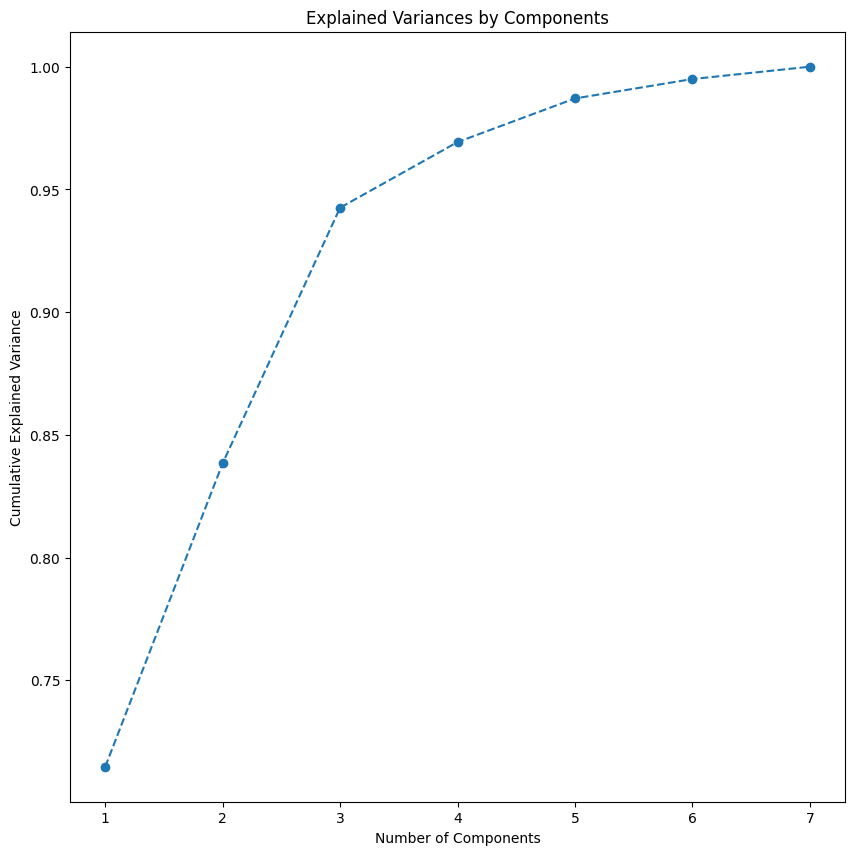

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 8), exp_var.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


The output represents a plot showing the cumulative explained variance by individual components. The x-axis represents the number of components, while the y-axis represents the cumulative explained variance. Each point on the plot indicates the cumulative explained variance up to that component.

:Determine the minimum number of components required to explain over 92% of the variance.

In [ ]:
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:__________________**
The output indicates that three principal components are needed to explain at least 90% of the variance in the data. This means that these three components capture the majority of the variability present in the original dataset.

In [ ]:
# Accessing the coefficients of the first three principal components
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T


,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


The output is a table showing the loadings of original features (e.g., mpg, cylinders, displacement) on the first three principal components (PC1, PC2, and PC3) obtained from PCA.

Principal Components: PC1 captures the most variance, while PC2 and PC3 capture additional variance orthogonal to PC1. Loadings: Values indicate the strength and direction of the relationship between features and principal components. Interpretation: Features with higher loadings contribute more strongly to the corresponding principal component. "horsepower" strongly influences PC1, while other features have less influence. Insight: Helps understand how original features are represented in the reduced-dimensional space defined by principal components, revealing underlying data structure.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


#### **Visualize the data in 2 dimensions using the first two principal components**



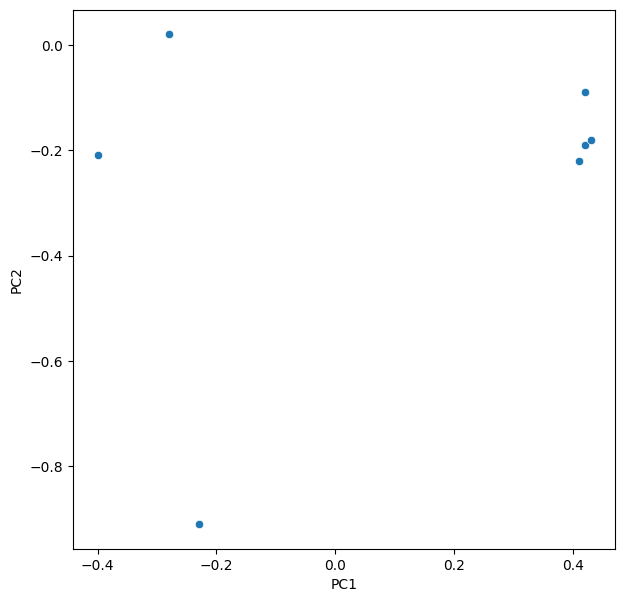

In [ ]:
# Check for typos in the variable name
data_pca.T.style.applymap(color_high)

plt.figure(figsize = (7, 7))

# Use the correct variable name and indices
sns.scatterplot(x = data_pca.iloc[0], y = data_pca.iloc[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()
plt.show()

Adding hue to the scatter plot

**Observations:___________**
Purpose Dimensionality Reduction: The code reduces the dimensionality of the data to 2 components, which helps in visualizing the data more easily. Visualization: By plotting the first two principal components, we can identify patterns, clusters, and the structure of the data that are not easily visible in higher dimensions. This visualization is particularly useful for exploratory data analysis (EDA), providing insights into the dataset and helping guide further analysis or modeling efforts.

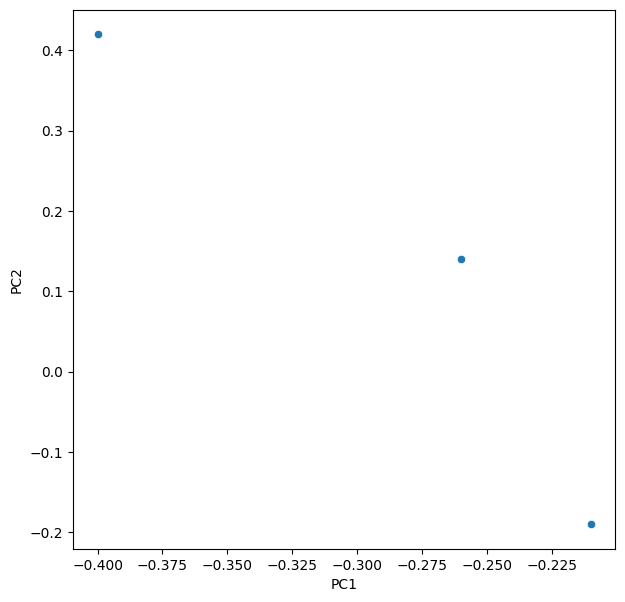

In [ ]:
df_concat = pd.concat([data_pca.iloc[:, :2], ], axis=1)
plt.figure(figsize = (7, 7))

# Create a scatter plot with x = 0 and y = 1 using df_concat dataframe
sns.scatterplot(x = data_pca.iloc[:, 0], y = data_pca.iloc[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The output of the code is a DataFrame concatenating the first two principal components (data_pca.iloc[:, :2]) with the labels . This concatenation allows for visualization of the data points in two dimensions along with their corresponding labels, facilitating insights into the distribution and patterns within the data.

## **t-SNE**

In [ ]:
# Use the t-SNE algorithm with a random state of 1
tsne = TSNE(random_state=1)

# Fit and transform the t-SNE algorithm on the scaled data
data_tsne = tsne.fit_transform(data_scaled)


The code uses t-SNE to reduce the dimensionality of the scaled data while preserving its local structure. It creates a t-SNE instance with a random state of 1 and applies it to the scaled data, storing the transformed data in data_tsne.

In [ ]:
data_tsne.shape

(398, 2)

The output (398, 2) indicates that the transformed data after applying t-SNE has 398 samples (rows) and 2 dimensions (columns). Each sample has been projected onto a two-dimensional space by the t-SNE algorithm.

In [ ]:

data_tsne = pd.DataFrame(data=data_tsne, columns=['Component 1', 'Component 2'])

This code converts the t-SNE transformed data array into a DataFrame with two columns labeled 'Component 1' and 'Component 2'.

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076



The output represents the transformed data after applying t-SNE algorithm. Each row corresponds to an observation, and there are two columns: 'Component 1' and 'Component 2', which are the two-dimensional representations of the original data points obtained through t-SNE transformation.

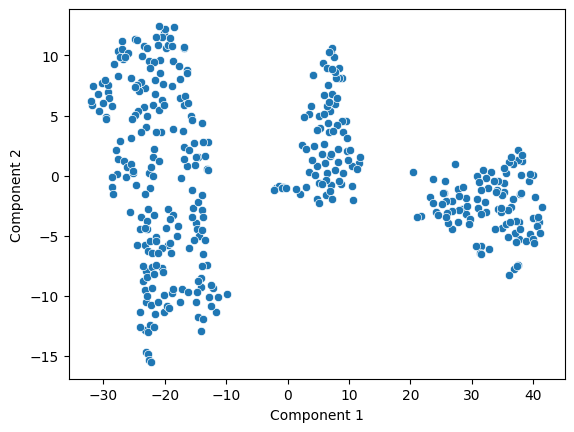

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

**Observations:______________**
The output is a scatter plot of the data transformed using t-SNE, with the x-axis representing the values of the first component and the y-axis representing the values of the second component. Each point on the plot represents a data point in the dataset, projected onto a two-dimensional space by t-SNE.

let's visualize the data using a scatter plot, considering the number of cylinders

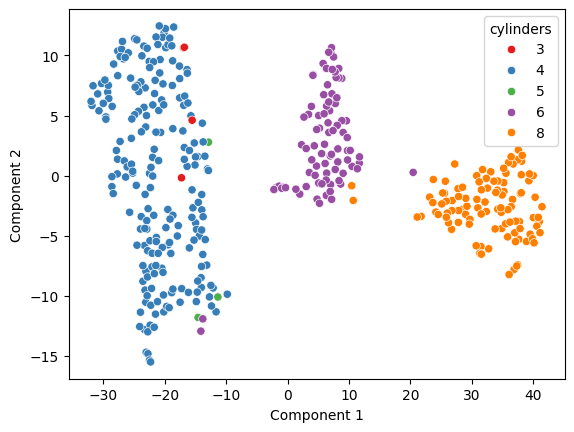

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0], y=data_tsne.iloc[:,1], hue=data.cylinders, palette='Set1')
plt.show()



This code generates a scatter plot of the data in two dimensions (Component 1 and Component 2) obtained from t-SNE algorithm. Each point in the plot represents an observation in the dataset, and the color of the points is determined by the number of cylinders in the corresponding vehicles.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

In [ ]:
#Let's categorize points into three distinct groups.

def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component > 0) and (second_component > -5):
        return 'group_1'
    if (first_component > -20) and (first_component < 5):
        return 'group_2'
    else:
        return 'group_3'


**Observations:___________**

The purpose of this code is to define a grouping function that categorizes observations based on their values in the 'Component 1' and 'Component 2' columns. It assigns each observation to one of three groups: 'group_1', 'group_2', or 'group_3' according to specific conditions defined by the values of these components.

In [ ]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

The purpose of this code is to create a new column in the DataFrame data_tsne called 'groups', where each point is assigned to one of the three groups based on the defined criteria in the grouping function.

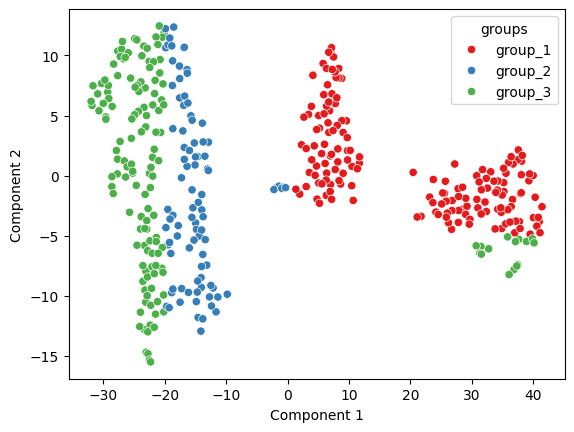

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:, 0], y=data_tsne.iloc[:, 1], hue=data_tsne.iloc[:, 2], palette='Set1')
plt.show()


This code visualizes the data points in a scatter plot with the x-axis representing the values of the first component (Component 1), the y-axis representing the values of the second component (Component 2), and the color of each point indicating the group assignment. The hue parameter specifies the variable (data_tsne.iloc[:, 2]) used for coloring the points, which in this case is the grouping of the data points based on the grouping function applied earlier. The palette parameter specifies the color palette to be used for the plot. In this case, the 'Set1' palette is used, which consists of distinct colors suitable for visualizing categorical data.

In [ ]:
data['groups'] = data_tsne['groups']

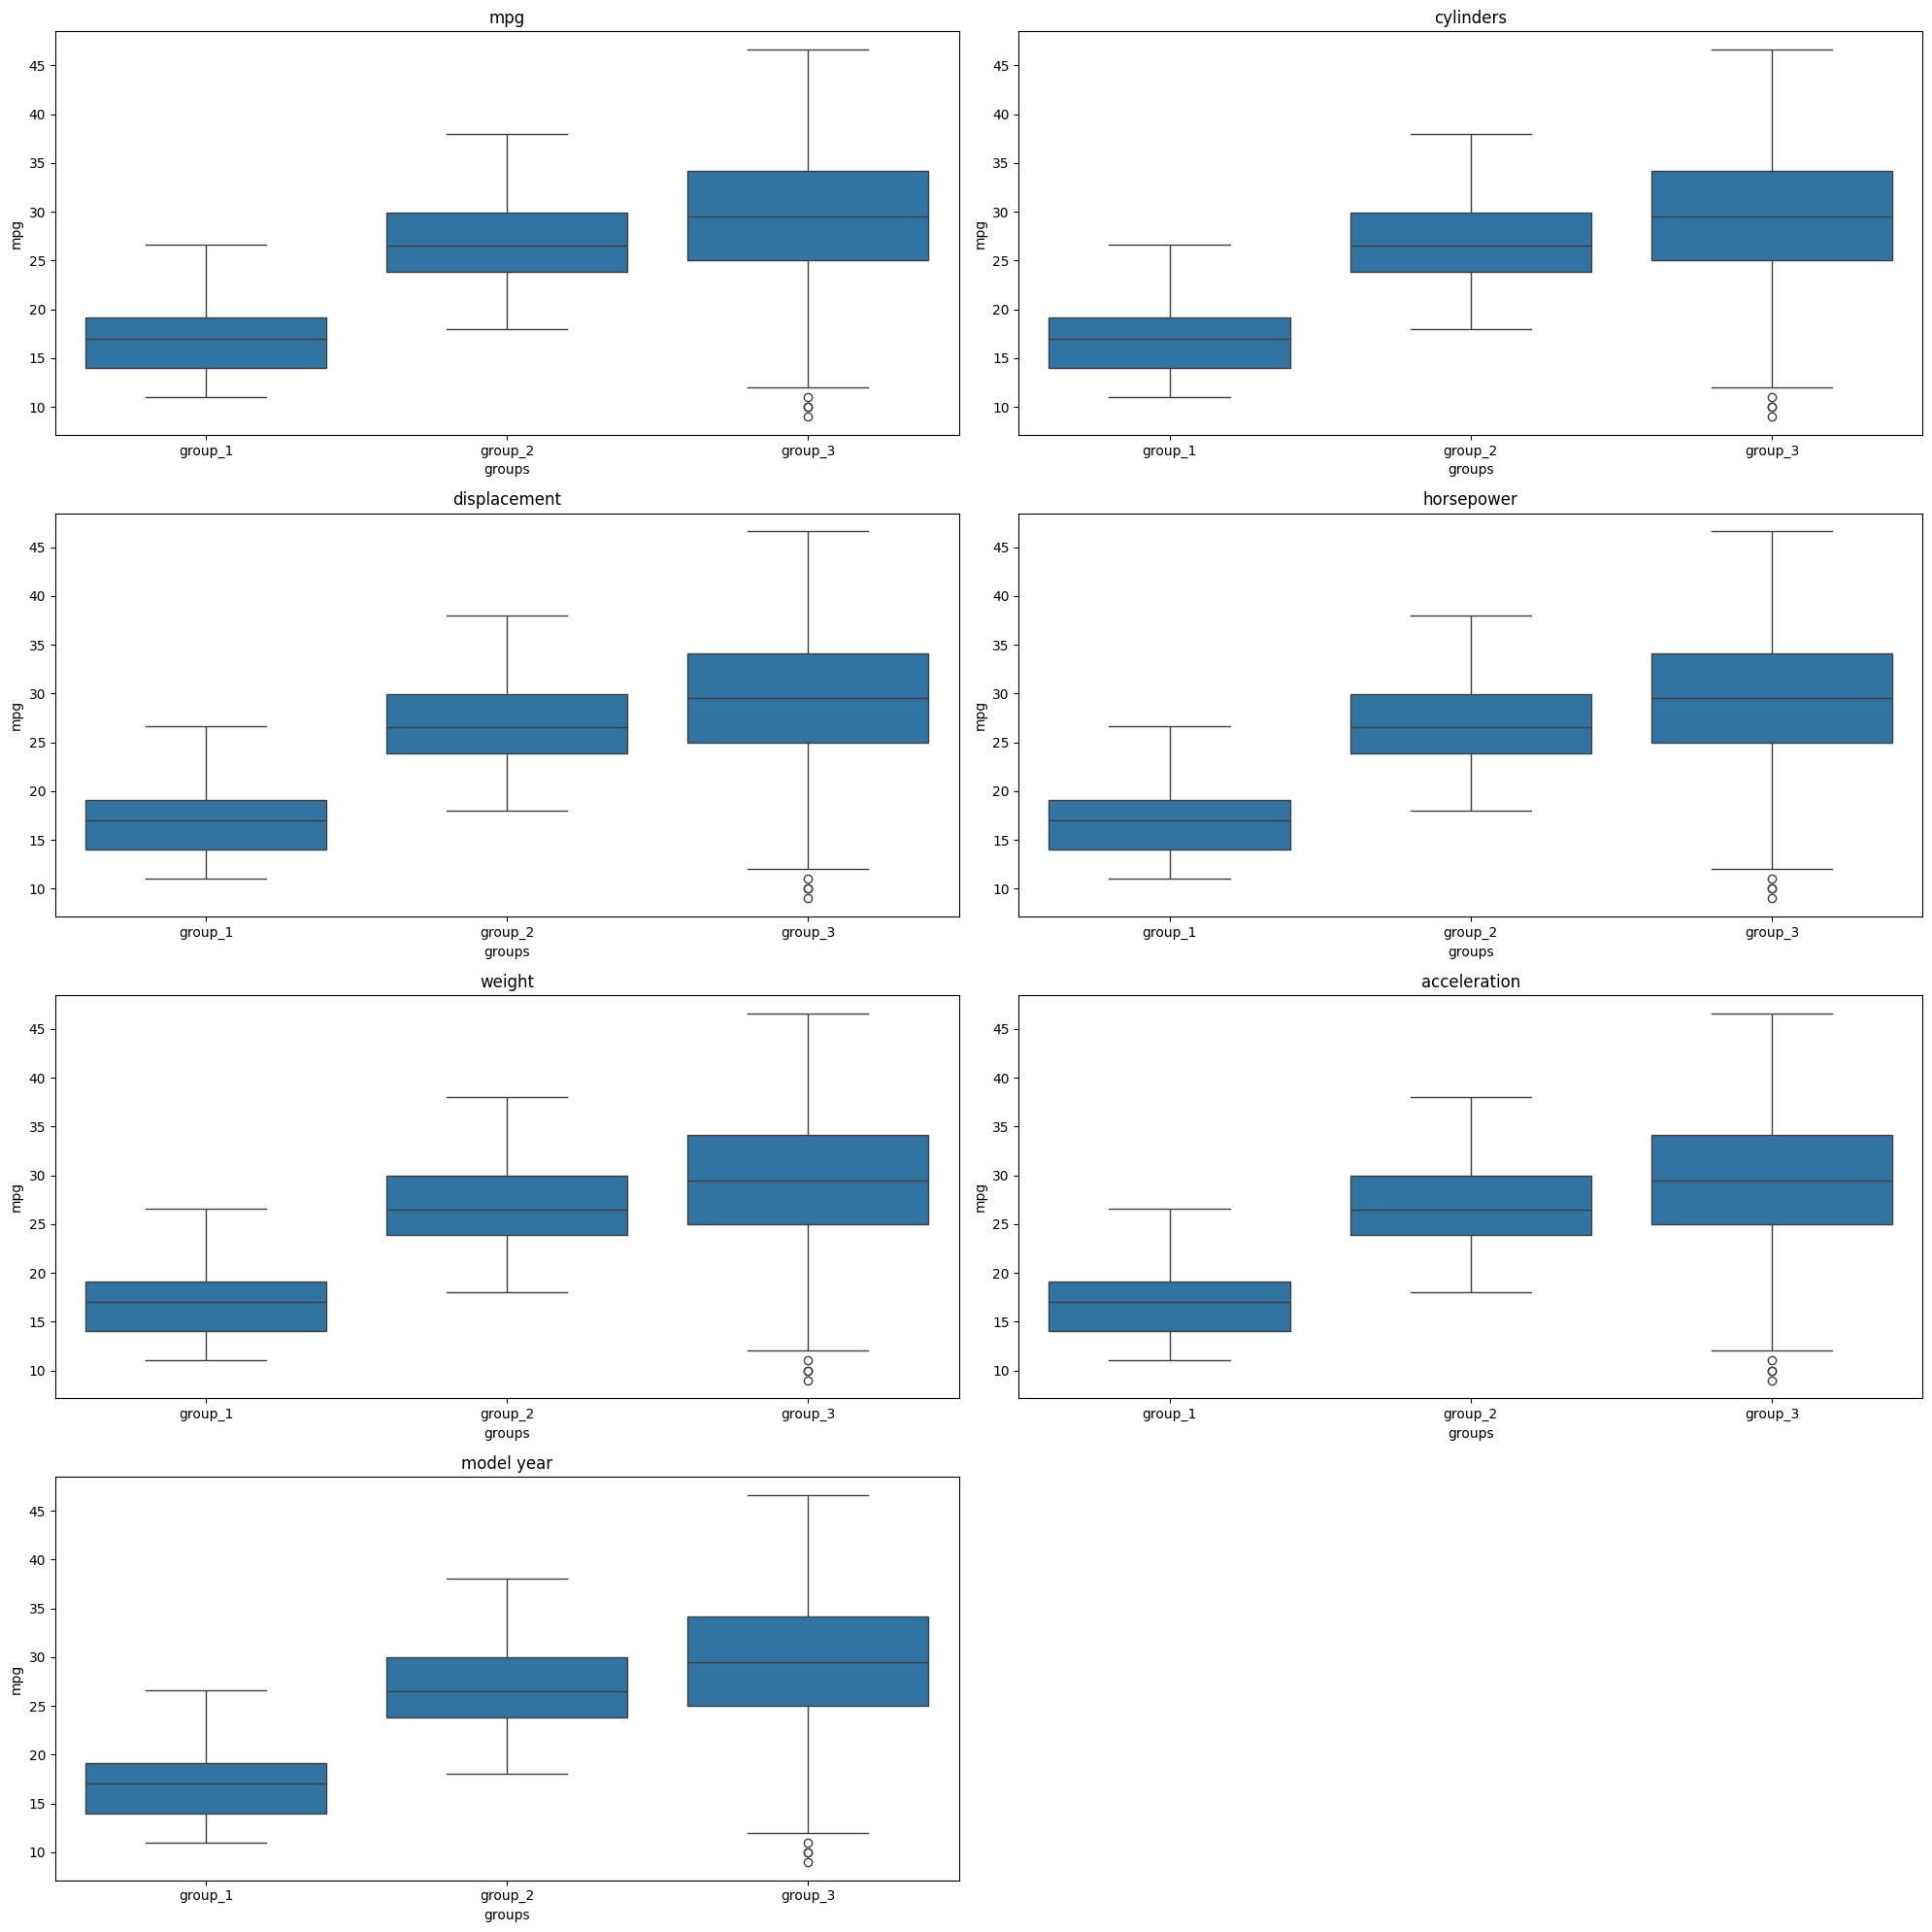

In [ ]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    sns.boxplot(x='groups', y='mpg', data=data) # Complete the code

    plt.tight_layout()

    plt.title(variable)

plt.show()

This code is designed to create a set of boxplots for each variable in the DataFrame data, grouped by the 'groups' column. It iterates through each column in data, excluding the 'car name' column, and creates a subplot for each variable. In each subplot, a boxplot is generated where the x-axis represents the groups and the y-axis represents the corresponding variable. This allows for the visual comparison of the distribution of each variable across different groups identified by the 'groups' column.

## **Actionable Insights and Recommendations**

**write your insights and recommendations here:**  ______

Based on the exploratory data analysis and dimensionality reduction techniques applied to the vintage car dataset, several insights can be drawn:

**Data Overview:**
The dataset comprises 398 entries with 8 variables, including features like mpg, cylinders, displacement, horsepower, weight, acceleration, and model year.
There are no missing values in the dataset after handling non-numeric entries in the 'horsepower' column.

**Exploratory Data Analysis (EDA):**
The dataset exhibits a wide range of values across all variables, suggesting diversity in car specifications from the 1970s.
Correlation analysis reveals relationships between variables, with notable negative correlations between mpg and variables like cylinders, displacement, horsepower, and weight.
Skewness examination indicates the distribution shapes, with most variables showing positive skewness.
Boxplots and histograms are used to identify outliers and visualize variable distributions.

**Dimensionality Reduction using PCA:**
Principal Component Analysis (PCA) is employed to reduce the dimensionality of the dataset.
Three principal components explain over 90% of the variance in the data, providing a condensed representation of the original features.
Interpretation of PCA loadings highlights the influence of each original feature on the principal components.

**t-SNE Visualization:**
t-distributed Stochastic Neighbor Embedding (t-SNE) is used for further dimensionality reduction while preserving local structure.
The scatter plot of the t-SNE transformed data reveals clusters and patterns in two dimensions.

**Cluster Analysis:**
Data points are categorized into distinct groups based on t-SNE results.
Boxplots are utilized to visualize how variables like mpg, cylinders, displacement, etc., vary across different groups, providing insights into potential segmentation patterns.

**Conclusion:**
The vintage car dataset exhibits diverse characteristics, with variables showing varied distributions and correlations.
Dimensionality reduction techniques like PCA and t-SNE help in understanding the underlying structure of the data and identifying meaningful patterns.
Insights from EDA and dimensionality reduction can inform marketing strategies, segmentation approaches, and further analysis in the vintage car market.